In [1]:
#Importing Libraries 

import pandas as pd
import numpy as np
import re          #regular expression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("Language Detection.csv")
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [3]:
data["Language"].value_counts() #value_counts() is used to get a Series containing counts of unique values. 

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [4]:
#Separating Independent and Dependent features
X = data["Text"]
y = data["Language"]

#Label Encoding to convert it into a numerical form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
print(np.unique(data["Language"]))

['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Malayalam' 'Portugeese' 'Russian' 'Spanish'
 'Sweedish' 'Tamil' 'Turkish']


In [25]:
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


TEXT PREPROCESSING

In [7]:
data_list = []

# iterating through all the text
for text in X:         
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      # removing the symbols and numbers
    text = re.sub(r'[[]]', ' ', text)   
    text = text.lower()          # converting the text to lower case
    data_list.append(text)       # appending to data_list

In [8]:
#Bag of Words [ converting text into numerical form by creating a Bag of Words model using CountVectorizer.]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # tokenize a collection of text documents
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

In [9]:
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [10]:
# Model Training
from sklearn.naive_bayes import MultinomialNB  #classifier is suitable for classification with discrete features
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [11]:
#predict output for test dataset
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [13]:
print("Accuracy is :{:.2f}".format(ac*100))

Accuracy is :97.97


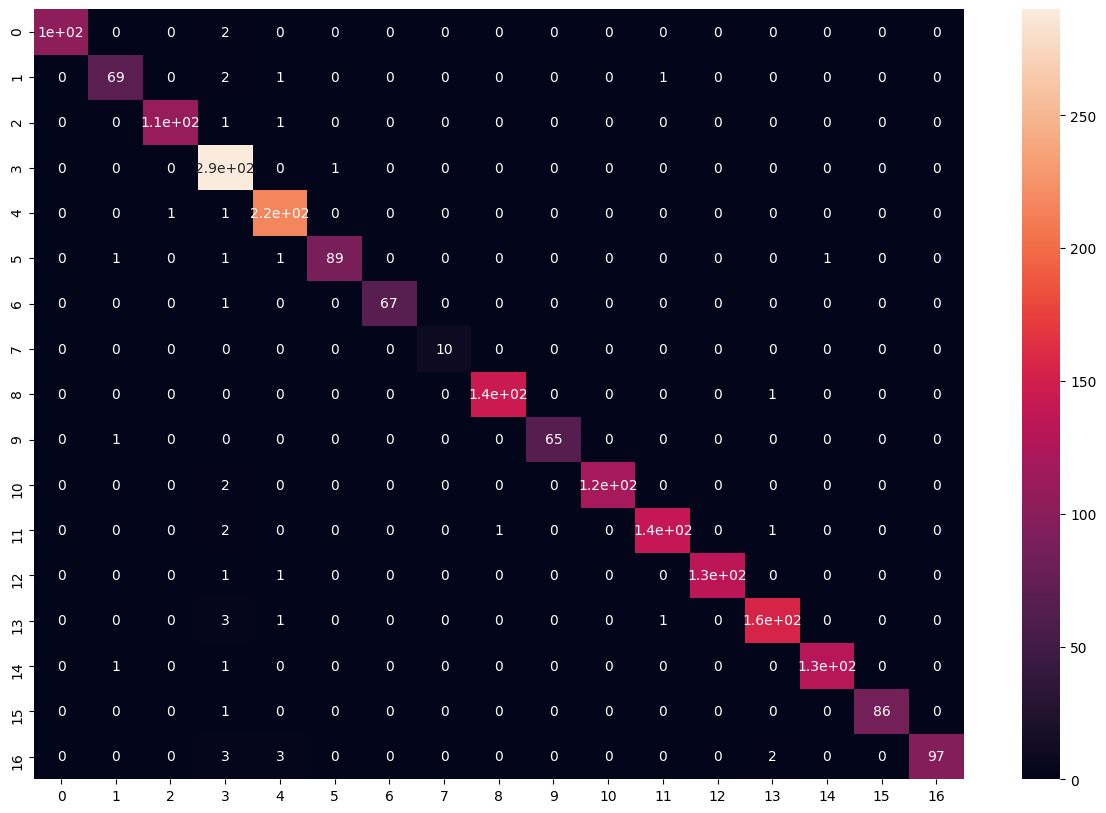

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [15]:
#Predicting with some more data

def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [16]:
predict('The quick and lazy fox jump over the stone')

The langauge is in English


In [17]:
predict('നൽകുന്നു')

The langauge is in Malayalam


In [27]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [32]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
sentence = "My name is not Raju"
x = cv.transform([sentence]).toarray()
ans = pickled_model.predict(x)
lang = le.inverse_transform(ans) # finding the language corresponding the the predicted value
print("The langauge is in",lang[0])

The langauge is in English


In [19]:
import pickle

In [33]:
pickle.dump(cv, open('vector.pkl', 'wb'))